<a href="https://colab.research.google.com/github/Saulcuervo03/Extracciondedatos/blob/main/3_Valores_at%C3%ADpicos_Columnas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Importamos las librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [16]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Inmuebles_sin_nulos.csv')

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

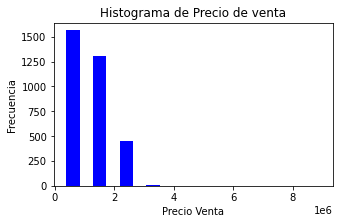

In [22]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=data["Precio Venta"], color='blue', rwidth=0.50)
plt.title('Histograma de Precio de venta')
plt.xlabel('Precio Venta')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

In [ ]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data["Precio Venta"])
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

Método de desviación estándar

In [19]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y=data["Precio Venta"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Límite superior permitido 3114598.8777611195
Limite inferior permitido -706854.573895372


In [ ]:
#Encontramos Outliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos limpios
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

In [ ]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data_clean["Precio Venta"])
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

 **Método de IQR (Rango Inter Quartilico)**

In [27]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["Precio Venta"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 3007754.0
Limite inferior permitido -691390.0


In [ ]:
#Encontramos Outliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

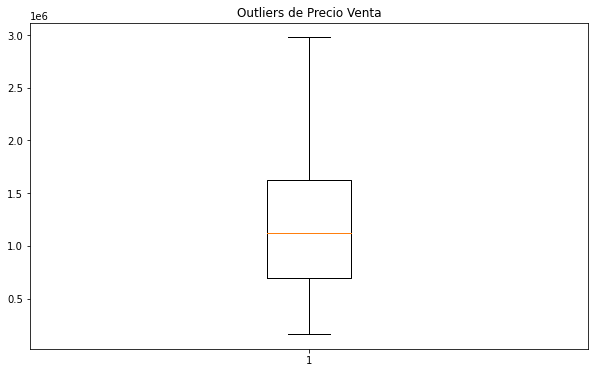

In [31]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data_clean_iqr["Precio Venta"])
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama